In [14]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [15]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [17]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [18]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [19]:
len(data)

81

In [20]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [21]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [22]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [23]:
Y.shape

(81, 6, 3, 2)

In [24]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
X_test, Y_test = formating(X_test, Y_test)

In [25]:
X_test.shape

(48, 3, 2)

In [26]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
minimum_loss = float('inf')
for epoch in range(200):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    l0.append(model.evaluate(X_test, Y_test))
    if l0[-1] < minimum_loss:
            minimum_loss = l0[-1]
            model.save('best.h5')

2/2 [==============================] - 0s 165ms/step - loss: 498.4590


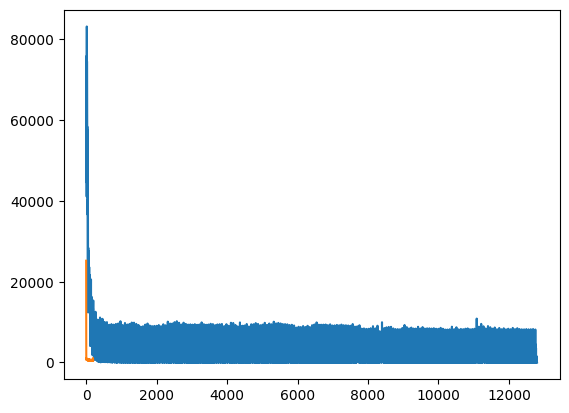

In [27]:
plt.plot(l)
plt.plot(l0)
plt.show()

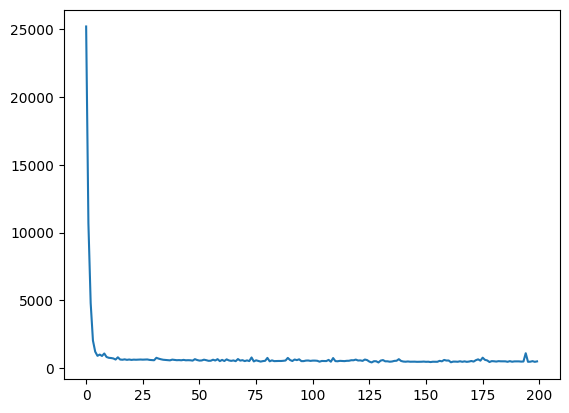

In [28]:
plt.plot(l0)

In [29]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

best epoch: 418.284912109375 best batch: 3.023247003555298


In [30]:
l0[-1]

498.458984375

In [31]:
model.save('last.h5')

In [32]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [34]:
restore_changes(data[0],0,None)

[[[265.0, 556.0], [327.0, 521.0], [402.0, 445.0]],
 [[236.0, 558.0], [177.0, 565.0], [357.0, 469.0]],
 [[270.0, 576.0], [201.0, 596.0], [309.0, 486.0]],
 [[266.0, 581.0], [220.0, 615.0], [317.0, 506.0]],
 [[242.0, 593.0], [146.0, 612.0], [361.0, 486.0]],
 [[362.0, 550.0], [420.0, 468.0], [418.0, 452.0]],
 [[362.0, 550.0], [420.0, 468.0], [418.0, 452.0]]]

In [ ]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [ ]:
# restore_changes(data[0],0)

In [45]:
model = tf.keras.models.load_model('last.h5')
a= model.predict(data[0]).tolist()

1/1 [==============================] - 0s 316ms/step


In [40]:
a[0]

[[21.103517532348633, -350.386962890625],
 [72.66068267822266, -392.014892578125],
 [136.18894958496094, -477.59002685546875]]

In [42]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [46]:
points = restore_changes(a,0,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for p in f:
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
    cv2.imwrite(f'outputs/output{n}.png', img)